In [9]:
import queue, time
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
def order_bfs(graph, start_node):
    visited = set()
    q = queue.Queue()
    q.put(start_node)
    order = []

    while not q.empty():
        vertex = q.get()

        if vertex is not visited:
            order.append(vertex)
            visited.add(vertex)
            for node in graph[vertex]:
                if node not in visited:
                    q.put(node)
    return order

def order_dfs(graph, start_node, visited=None):
    if visited is None:
        visited = set()

    order = []

    if start_node not in visited:
        order.append(start_node)
        visited.add(start_node)

        for node in graph[start_node]:
            if node not in visited:
                order.extend(order_dfs(graph, node, visited))
                
    return order
                


In [11]:
def visualize(order, title, G, pos):
    plt.figure()
    plt.title(title)

    for i, node in enumerate(order, start=1):
        plt.clf()
        plt.title(title)
        nx.draw(G, pos, with_labels=True, node_color=['r' if n==node else 'g' for n in G.nodes])
        plt.draw()
        plt.pause(0.5)

    # plt.ioff()
    plt.show()
    time.sleep(0.5)


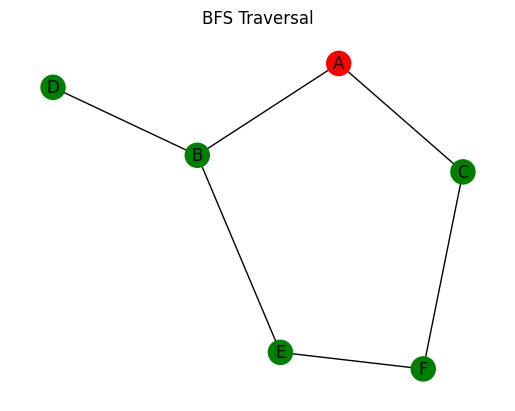

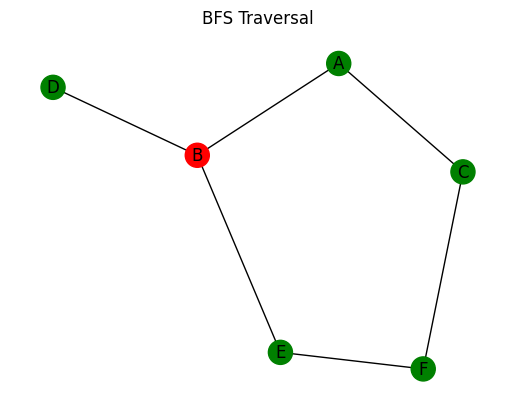

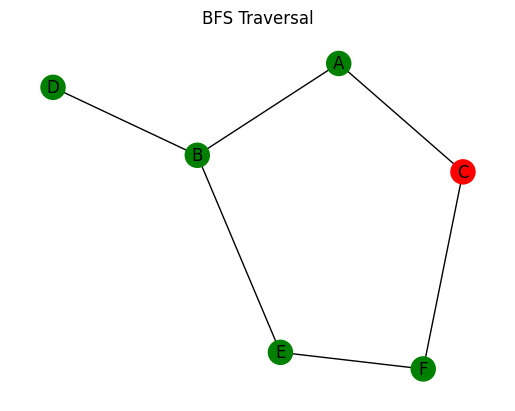

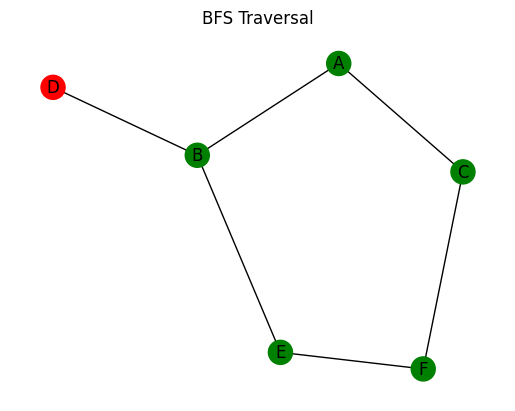

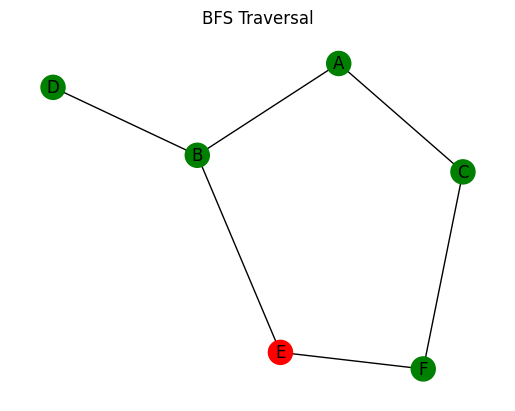

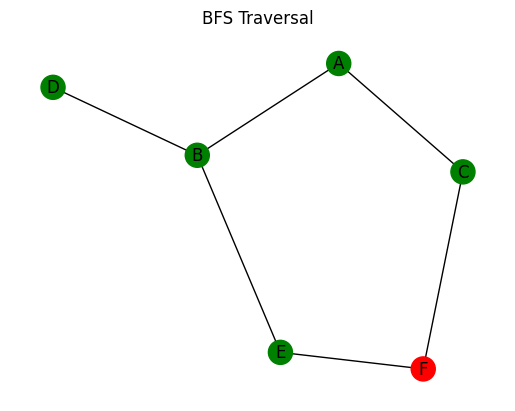

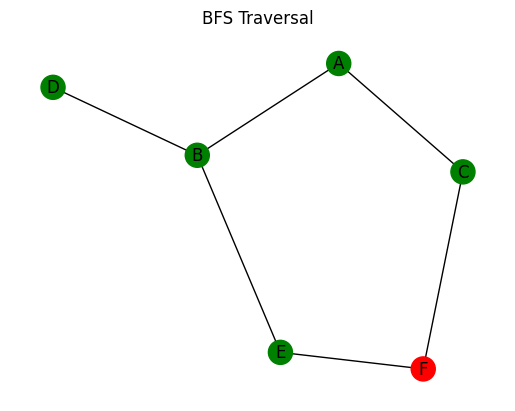

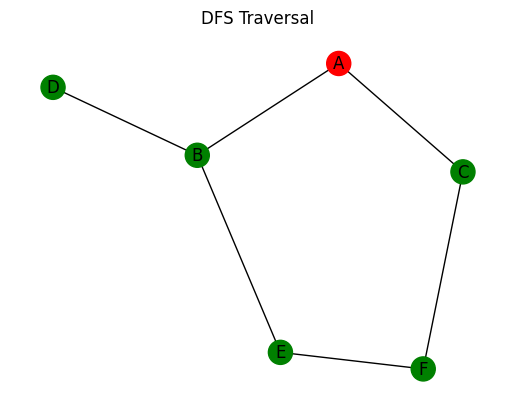

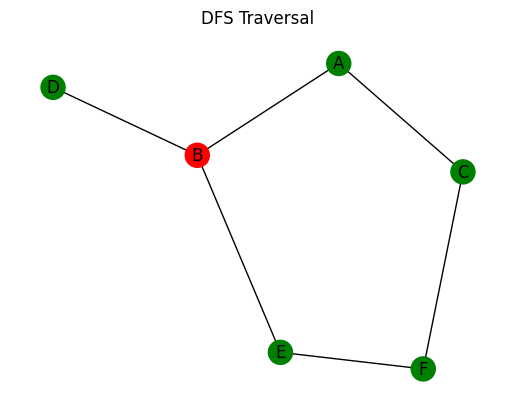

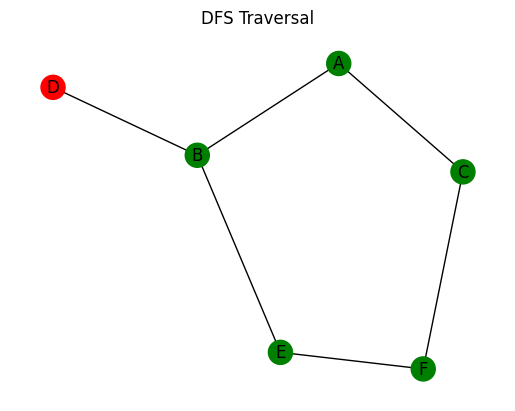

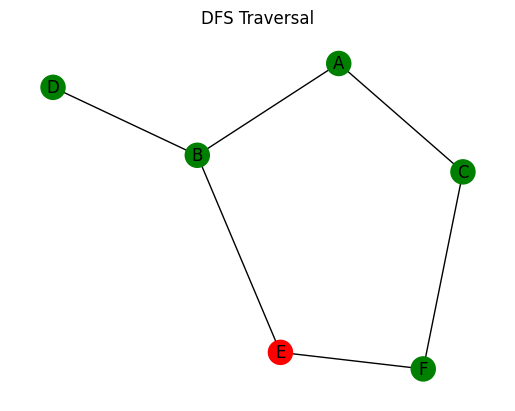

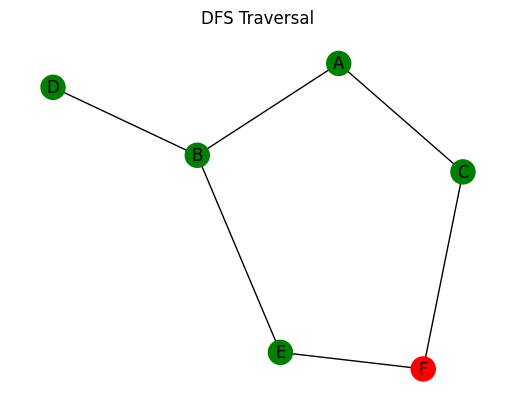

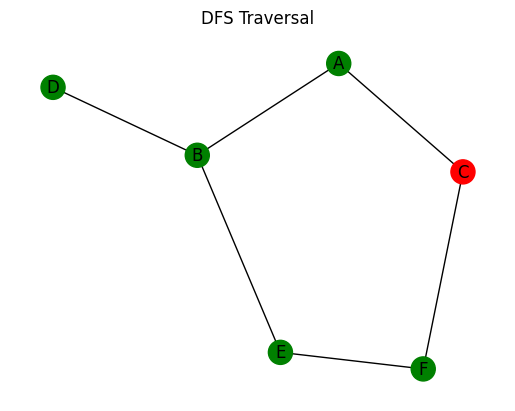

In [12]:
G = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), 
    ('B', 'E'), ('C', 'F'), ('E', 'F')
]
G.add_edges_from(edges)
graph = {node: list(G.neighbors(node)) for node in G.nodes}
pos = nx.spring_layout(G)

# --- Run Traversals ---
start_node = 'A'
bfs_order = order_bfs(graph, start_node)
dfs_order = order_dfs(graph, start_node)

# --- Visualize ---
visualize(bfs_order, "BFS Traversal", G, pos)
visualize(dfs_order, "DFS Traversal", G, pos)